## Residual-based estimation

Let $X \sim U[-2,2]$ and 

\begin{equation}
Y_i=a\left\{X_i+2 \exp \left(-16 X_i^2\right)\right\}+\sigma\left(X_i\right) \varepsilon_i
\end{equation}

where $\varepsilon \sim \mathcal{N} \left(0,1\right)$.

The variance function is described by

\begin{equation}
\sigma \left(x \right) = 0.4 \exp \left(-2 x^2\right)+0,2.
\end{equation}


We estimate the regression function 
\begin{equation}
m \left(X_{i} \right) = \mbox{ E} \left(Y_{i} \mid X_{i} \right)
\end{equation}

In [1]:
from functions import *
import matplotlib.pyplot as plt

In [2]:
#Setting 
#Hyperparameter set-up
n = 1000
h=0.2
a=0.5

b0 = 0
b1 = 1

#Data generation 
X = np.random.uniform(-2,2,n)
X.sort()
y = fan(X,n,a)

omega = bernoulli.rvs(pi(y,1,1), size=n)

pi_hat = [pi_hat(h,z,y,pi(y,1,1),omega) for z in np.linspace(-1, 1, n)]


We want to estimate

\begin{equation}
\sigma_{n}^{2} \left(x\right) = \frac{
\sum_{i=1}^{n} \widehat{r} \left(X_{i}\right) K \left(
    \frac{x-X_{i} }{h}
    \right)
}{\sum_{i=1}^{n} K \left(
    \frac{x-X_{i} }{h}
    \right)},
\end{equation}

where $\widehat{r} \left(X_{i}\right) = \left\{Y_{i}-m_n \left(X_{i} \right)\right\}^{2}$.



In [3]:
#Estimated regression functions 

m_hat_nw = [nw(h,t,X,y) for t in X ]

m_hat_hw = [nw_mis(h,t,X,y,pi(y,1,1),omega) for t in X ]

m_hat_hw_est = [nw_mis(h,t,X,y,pi_hat,omega) for t in X]

#Residual estimates 

r_hat = (y-m_hat_nw)**2

r_hat_hw = (y-m_hat_hw)**2

r_hat_hw_est = (y-m_hat_hw_est)**2

In [4]:
#Residual-based estimator 

[]

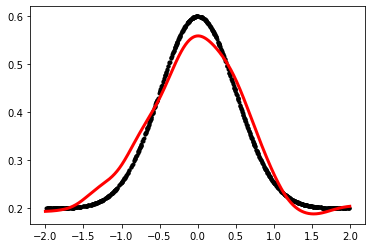

In [5]:
#H-Sample 

h1 = 0.2

fig, ax = plt.subplots(1, 1)
ax.plot(X,sigma_reg(X,n),'o', color='black',markersize=3)
ax.plot(np.linspace(-2, 2, n),[sigma_res(h1,t,X,r_hat) for t in np.linspace( -2, 2, n)],color= 'red', lw=3)
ax.plot()

## The residual-based estimation with missing values

Horwitz-Thompson type estimator is

\begin{equation}
\widehat{r}_{n,mis}^{nw} (x)=\frac{\sum_{i=1}^n \frac{\Omega_i \widehat{r} \left(X_{i} \right)}{\pi \left(Y_i\right)} K\left(\frac{x-X_i}{h}\right)}{\sum_{i=1}^n \frac{\Omega_i}{\pi \left(Y_i\right)} K\left(\frac{x-X_i}{h_{r}}\right)},
\end{equation}

where $\widehat{r}_{n,mis}^{nw} \left(X_{i} \right) = \left\{ Y_{i} - m_{n,mis}^{nw} \right\}^{2}$.

In case $\pi (\cdot)$ is not known, it is estimated with

\begin{equation}
  \pi_{n} \left(y\right) =   \frac{
    \sum_{k=1}^{n} \Omega_{k}
    K\left(\frac{y-Y_{k}}{h}\right)
    }{
    \sum_{j=1}^{n} 
    K\left(\frac{y-Y_{j}}{h}\right)
    }. 
\end{equation}

[]

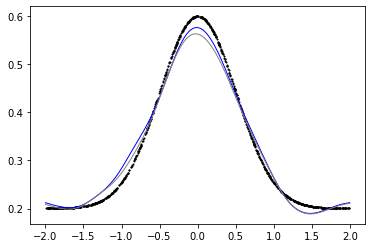

In [6]:
#Residual-based estimator with missing alues 

h1 = 0.2

fig, ax = plt.subplots(1, 1)
ax.plot(X,sigma_reg(X,n),'o', color='black',markersize=1)
ax.plot(np.linspace(-2, 2, n),[sigma_mis_res(h1,t,X,r_hat_hw,pi(y,1,1),omega) for t in np.linspace( -2, 2, n)],'-g',color= 'blue', lw=1)
ax.plot(np.linspace( -2, 2, n),[sigma_mis_res(h1,t,X,r_hat_hw_est,pi_hat,omega) for t in np.linspace( -2, 2, n)],'-g',color= 'grey', lw=1)
ax.plot()

## Difference based estimator 

The difference-based HW-type estimator is 

\begin{equation}
\sigma^{2}_{df,mis}(x)=\frac{1}{2} \sum_{i=1}^{n-1} 
\frac{\Omega_{i}}{\pi \left( Y_{i}\right)}
 D_i^2 K_{*}\left( \frac{x-X_{i}}{h} \right),
\end{equation}
where $D_{i}^2 = \left( Y_{i} - Y_{i+1} \right)^{2}$


[]

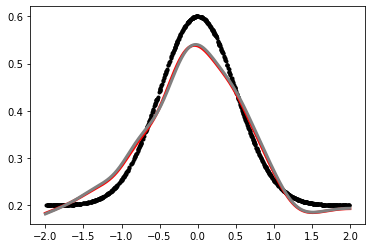

In [7]:
h1 = 0.22

fig, ax = plt.subplots(1, 1)
ax.plot(X,sigma_reg(X,n),'o', color='black',markersize=3)

ax.plot(np.linspace(-2, 2, n),[diff_vol(h1,t,X,y) for t in np.linspace(-2, 2, n)],'-g',color= 'red', lw=3)

ax.plot(np.linspace(-2, 2, n),[diff_vol_mis(h1,t,X,y,pi(y,1,1),omega) for t in np.linspace(-2, 2, n)],'-g',color= 'grey', lw=3)

ax.plot()

## Error analysis: MSE analysis

In [8]:
sigma = [sigma(t) for t in np.linspace( -2, 2, n)]

In [9]:


sigma_res = [sigma_res(h1,t,X,r_hat) for t in np.linspace( -2, 2, n)]

sigma_df = [diff_vol(h1,t,X,y) for t in np.linspace(-2, 2, n)]

#With missings 

sigma_hw = [sigma_mis_res(h1,t,X,r_hat_hw,pi(y,1,1),omega) for t in np.linspace( -2, 2, n)]

sigma_hw_est = [sigma_mis_res(h1,t,X,r_hat_hw_est,pi_hat,omega) for t in np.linspace( -2, 2, n)]

sigma_df_mis = [diff_vol_mis(h1,t,X,y,pi(y,1,1),omega) for t in np.linspace(-2, 2, n)]

sigma_df_mis_est = [diff_vol_mis(h1,t,X,y,pi(y,1,1),omega) for t in np.linspace(-2, 2, n)]


In [10]:
sum([(a-b)**2 for a,b in zip(sigma,sigma_df)])/len(sigma)

0.0008979585865054809